In [1]:
import numpy as np

import gym
import stable_baselines
from stable_baselines import A2C, ACER, ACKTR, DQN, DDPG, SAC, PPO1, PPO2, TD3, TRPO
from stable_baselines.common.env_checker import check_env
from stable_baselines.common.policies import MlpPolicy

import fakegym as fg
import importlib

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/home/mats/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


<Figure size 720x720 with 0 Axes>

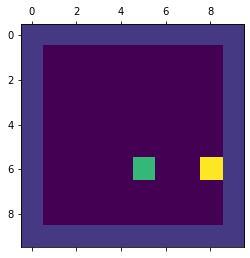

In [2]:
importlib.reload(fg)

class MyObservation():
    def __init__(self, env):
        self.env = env
        self.gps_actual = None
        self.gps_target = None
        # self.distance = None
        # self.touching = None

    def _update(self):
        self.gps_actual = self.env.state_object.gps_actual
        self.gps_target = self.env.state_object.gps_target
        # self.distance = self.env.state_object.distance
        # self.touching = self.env.state_object.touching

    def shape(self):
        """Make sure length is correct here.In this example:
        gps_actual: 2
        gps_target: 2
        distance:   4
        touching:   1
        =================
                   (9, )
        
        """
        return (4, )

    def get(self, env):
        """Get observation as numpy array."""
        self._update()
        
        arr = np.empty(0)
        arr = np.hstack((arr, np.array(self.gps_actual)))
        arr = np.hstack((arr, np.array(self.gps_target)))
        # arr = np.hstack((arr, np.array(self.distance)))
        # arr = np.hstack((arr, np.array(self.touching)))
        
        return arr
    

class MyEnv(fg.FakeGym):
    def __init__(self, seed=None, N=10, num_of_sensors=4, obstacles_each=0,
                 step_range=(1, 1), action_type="discrete",
                 discrete_action_shaping="flatten", obs=MyObservation):
        super(MyEnv, self).__init__(seed, N, num_of_sensors, obstacles_each, step_range, action_type, discrete_action_shaping, obs)
        

    def calc_reward(self):
        """Calculate reward function.

        Idea(Mats):
        

        """
        if self.gps_actual == self.gps_target:
            reward = 1000
        else:
            target_distance = self.get_target_distance()
            max_distance = 8
            reward = -1 * np.tanh(target_distance/(max_distance/2))
            if self.com.state.touching:
                reward = reward - 10
        return reward
        
        
    def check_done(self):
        if self.com.time_steps == 100:
            return True
        if self.gps_actual == self.gps_target:
            return True
        return False


env = MyEnv()
check_env(env)
env.render()

In [4]:
time_steps = 20000
reward_function = "tanh"
fake = "FakeGym"
name = "TRPO_mk1"
model_name = "PPO1_{}_{}_{}_{}".format(fake, name, reward_function, time_steps)

model = PPO1("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=time_steps, log_interval=100)
model.save("models/{}".format(model_name))
del model

********** Iteration 0 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00105 |      -0.01385 |      2.40e+04 |       0.00104 |       1.38541
     -0.00883 |      -0.01382 |      2.40e+04 |       0.00475 |       1.38200
     -0.01353 |      -0.01376 |      2.40e+04 |       0.01060 |       1.37633
     -0.01363 |      -0.01371 |      2.39e+04 |       0.01639 |       1.37070
Evaluating losses...
     -0.01420 |      -0.01369 |      2.39e+04 |       0.01853 |       1.36866
----------------------------------
| EpLenMean       | 70.3         |
| EpRewMean       | 197          |
| EpThisIter      | 3            |
| EpisodesSoFar   | 3            |
| TimeElapsed     | 0.752        |
| TimestepsSoFar  | 256          |
| ev_tdlam_before | -0.000313    |
| loss_ent        | 1.3686564    |
| loss_kl         | 0.018525003  |
| loss_pol_entpen | -0.013686564 |
| loss_pol_surr   | -0.014198221 |
| loss_vf_loss    | 23931.32     |
------

********** Iteration 8 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00441 |      -0.01337 |      2.48e+05 |       0.00051 |       1.33704
     -0.01566 |      -0.01331 |      2.48e+05 |       0.00632 |       1.33074
     -0.01552 |      -0.01322 |      2.48e+05 |       0.01483 |       1.32182
     -0.02050 |      -0.01320 |      2.47e+05 |       0.01171 |       1.32033
Evaluating losses...
     -0.02384 |      -0.01321 |      2.47e+05 |       0.00720 |       1.32070
----------------------------------
| EpLenMean       | 50.7         |
| EpRewMean       | 679          |
| EpThisIter      | 10           |
| EpisodesSoFar   | 45           |
| TimeElapsed     | 4.4          |
| TimestepsSoFar  | 2304         |
| ev_tdlam_before | -8.85e-05    |
| loss_ent        | 1.3206977    |
| loss_kl         | 0.007201977  |
| loss_pol_entpen | -0.013206976 |
| loss_pol_surr   | -0.023836657 |
| loss_vf_loss    | 246781.02    |
------

********** Iteration 16 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     8.56e-05 |      -0.01180 |      4.27e+05 |       0.00056 |       1.17962
     -0.00455 |      -0.01167 |      4.26e+05 |       0.00424 |       1.16720
     -0.01911 |      -0.01155 |      4.26e+05 |       0.00501 |       1.15462
     -0.02398 |      -0.01143 |      4.25e+05 |       0.00544 |       1.14334
Evaluating losses...
     -0.02519 |      -0.01135 |      4.25e+05 |       0.00796 |       1.13540
----------------------------------
| EpLenMean       | 21.8         |
| EpRewMean       | 975          |
| EpThisIter      | 19           |
| EpisodesSoFar   | 139          |
| TimeElapsed     | 8.18         |
| TimestepsSoFar  | 4352         |
| ev_tdlam_before | -3.22e-06    |
| loss_ent        | 1.135396     |
| loss_kl         | 0.007959828  |
| loss_pol_entpen | -0.01135396  |
| loss_pol_surr   | -0.025188763 |
| loss_vf_loss    | 425209.0     |
-----

********** Iteration 24 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00145 |      -0.00813 |      6.25e+05 |       0.00018 |       0.81282
     -0.00228 |      -0.00801 |      6.25e+05 |       0.00295 |       0.80075
     -0.00718 |      -0.00787 |      6.24e+05 |       0.00566 |       0.78692
     -0.01207 |      -0.00779 |      6.24e+05 |       0.00353 |       0.77880
Evaluating losses...
     -0.01470 |      -0.00773 |      6.23e+05 |       0.00294 |       0.77347
-----------------------------------
| EpLenMean       | 6.74          |
| EpRewMean       | 998           |
| EpThisIter      | 40            |
| EpisodesSoFar   | 373           |
| TimeElapsed     | 11.8          |
| TimestepsSoFar  | 6400          |
| ev_tdlam_before | -1.42e-05     |
| loss_ent        | 0.7734723     |
| loss_kl         | 0.002938299   |
| loss_pol_entpen | -0.0077347225 |
| loss_pol_surr   | -0.014697894  |
| loss_vf_loss    | 623453.4

********** Iteration 32 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00262 |      -0.00580 |      6.63e+05 |       0.00056 |       0.57961
     -0.00132 |      -0.00577 |      6.62e+05 |       0.00515 |       0.57681
     -0.00273 |      -0.00573 |      6.62e+05 |       0.00401 |       0.57308
     -0.00795 |      -0.00568 |      6.62e+05 |       0.00111 |       0.56845
Evaluating losses...
     -0.00898 |      -0.00565 |      6.61e+05 |       0.00165 |       0.56511
-----------------------------------
| EpLenMean       | 5.62          |
| EpRewMean       | 999           |
| EpThisIter      | 46            |
| EpisodesSoFar   | 697           |
| TimeElapsed     | 15.6          |
| TimestepsSoFar  | 8448          |
| ev_tdlam_before | -1.59e-05     |
| loss_ent        | 0.56510985    |
| loss_kl         | 0.0016524757  |
| loss_pol_entpen | -0.0056510987 |
| loss_pol_surr   | -0.008979976  |
| loss_vf_loss    | 661320.5

********** Iteration 40 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     5.60e-05 |      -0.00510 |      6.61e+05 |      3.66e-05 |       0.50981
     -0.00220 |      -0.00510 |      6.61e+05 |       0.00077 |       0.50974
     -0.00210 |      -0.00509 |      6.60e+05 |       0.00251 |       0.50891
     -0.00298 |      -0.00508 |      6.60e+05 |       0.00218 |       0.50799
Evaluating losses...
     -0.00534 |      -0.00508 |      6.60e+05 |       0.00176 |       0.50798
-----------------------------------
| EpLenMean       | 6.04          |
| EpRewMean       | 999           |
| EpThisIter      | 44            |
| EpisodesSoFar   | 1045          |
| TimeElapsed     | 19.6          |
| TimestepsSoFar  | 10496         |
| ev_tdlam_before | 5.13e-06      |
| loss_ent        | 0.507978      |
| loss_kl         | 0.0017631568  |
| loss_pol_entpen | -0.00507978   |
| loss_pol_surr   | -0.0053449497 |
| loss_vf_loss    | 659929.9

********** Iteration 48 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00027 |      -0.00456 |      6.53e+05 |      4.29e-05 |       0.45594
     -0.00186 |      -0.00455 |      6.53e+05 |       0.00022 |       0.45514
     -0.00452 |      -0.00456 |      6.53e+05 |       0.00043 |       0.45562
     -0.00537 |      -0.00457 |      6.53e+05 |       0.00142 |       0.45697
Evaluating losses...
     -0.00622 |      -0.00457 |      6.52e+05 |       0.00193 |       0.45707
-----------------------------------
| EpLenMean       | 5.15          |
| EpRewMean       | 1e+03         |
| EpThisIter      | 47            |
| EpisodesSoFar   | 1411          |
| TimeElapsed     | 23.7          |
| TimestepsSoFar  | 12544         |
| ev_tdlam_before | -4.05e-06     |
| loss_ent        | 0.4570737     |
| loss_kl         | 0.0019326583  |
| loss_pol_entpen | -0.0045707365 |
| loss_pol_surr   | -0.0062242895 |
| loss_vf_loss    | 652410.5

********** Iteration 56 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -2.54e-05 |      -0.00436 |      6.64e+05 |      9.94e-05 |       0.43616
     -0.00021 |      -0.00436 |      6.64e+05 |       0.00066 |       0.43561
     -0.00139 |      -0.00435 |      6.64e+05 |       0.00066 |       0.43478
     -0.00233 |      -0.00434 |      6.64e+05 |       0.00020 |       0.43395
Evaluating losses...
     -0.00280 |      -0.00433 |      6.64e+05 |       0.00018 |       0.43285
-----------------------------------
| EpLenMean       | 5.4           |
| EpRewMean       | 1e+03         |
| EpThisIter      | 48            |
| EpisodesSoFar   | 1790          |
| TimeElapsed     | 27.8          |
| TimestepsSoFar  | 14592         |
| ev_tdlam_before | 5.96e-07      |
| loss_ent        | 0.43284974    |
| loss_kl         | 0.0001822884  |
| loss_pol_entpen | -0.0043284977 |
| loss_pol_surr   | -0.0028031003 |
| loss_vf_loss    | 663822.9

********** Iteration 64 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     4.02e-05 |      -0.00466 |      6.52e+05 |      4.41e-06 |       0.46608
     -0.00081 |      -0.00466 |      6.52e+05 |      3.08e-05 |       0.46629
     -0.00208 |      -0.00467 |      6.52e+05 |       0.00021 |       0.46663
     -0.00226 |      -0.00468 |      6.52e+05 |       0.00047 |       0.46752
Evaluating losses...
     -0.00275 |      -0.00468 |      6.52e+05 |       0.00048 |       0.46788
-----------------------------------
| EpLenMean       | 5.4           |
| EpRewMean       | 1e+03         |
| EpThisIter      | 49            |
| EpisodesSoFar   | 2172          |
| TimeElapsed     | 31.8          |
| TimestepsSoFar  | 16640         |
| ev_tdlam_before | 5.36e-07      |
| loss_ent        | 0.46788037    |
| loss_kl         | 0.00048464607 |
| loss_pol_entpen | -0.0046788035 |
| loss_pol_surr   | -0.0027491534 |
| loss_vf_loss    | 652153.0

********** Iteration 72 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -7.88e-05 |      -0.00461 |      6.44e+05 |      4.79e-07 |       0.46055
     -0.00074 |      -0.00460 |      6.44e+05 |      2.84e-05 |       0.45994
     -0.00086 |      -0.00459 |      6.44e+05 |      7.91e-05 |       0.45946
     -0.00123 |      -0.00459 |      6.44e+05 |      7.54e-05 |       0.45949
Evaluating losses...
     -0.00130 |      -0.00459 |      6.43e+05 |      7.22e-05 |       0.45941
-----------------------------------
| EpLenMean       | 5.82          |
| EpRewMean       | 1e+03         |
| EpThisIter      | 45            |
| EpisodesSoFar   | 2552          |
| TimeElapsed     | 35.7          |
| TimestepsSoFar  | 18688         |
| ev_tdlam_before | 3.64e-06      |
| loss_ent        | 0.4594077     |
| loss_kl         | 7.22401e-05   |
| loss_pol_entpen | -0.0045940764 |
| loss_pol_surr   | -0.0013048574 |
| loss_vf_loss    | 643491.7

In [5]:
model_name

'PPO1_FakeGym_TRPO_mk1_tanh_20000'

Loading a model without an environment, this model cannot be trained until it has a valid environment.


/home/mats/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


<Figure size 720x720 with 0 Axes>

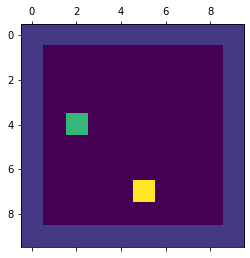

In [6]:
model = PPO1.load("models/{}".format(model_name))
env = MyEnv()
obs = env.reset()

env.render()
done = False
max_num_steps = 100
time = 0

5
4
0
3
5
1


/home/mats/Documents/Uni/ees-pees/backend/fakegym/fakegym.py:220: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 10))
/home/mats/Documents/Uni/ees-pees/backend/fakegym/fakegym.py:237: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.matshow(f)


8
6
7
5
4
8
4
9
5
9
7
1
8
4


<Figure size 720x720 with 0 Axes>

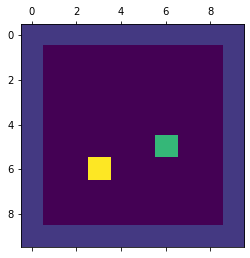

<Figure size 720x720 with 0 Axes>

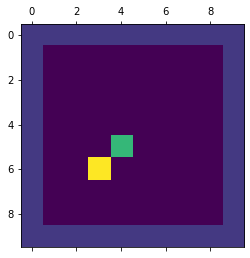

<Figure size 720x720 with 0 Axes>

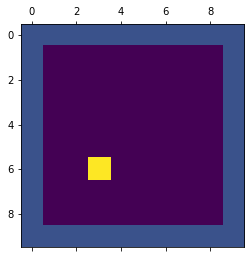

<Figure size 720x720 with 0 Axes>

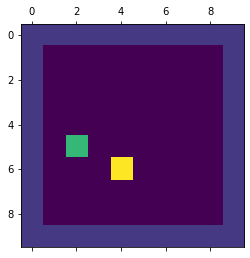

<Figure size 720x720 with 0 Axes>

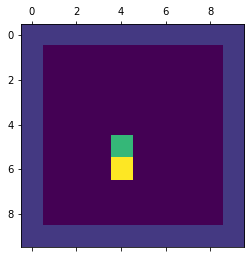

<Figure size 720x720 with 0 Axes>

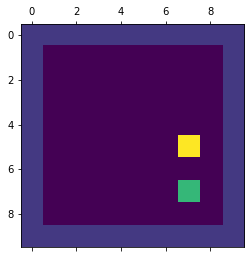

<Figure size 720x720 with 0 Axes>

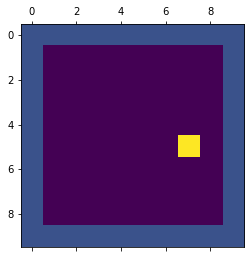

<Figure size 720x720 with 0 Axes>

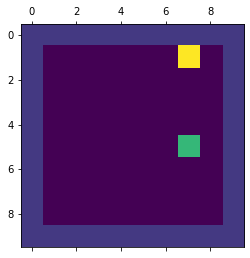

<Figure size 720x720 with 0 Axes>

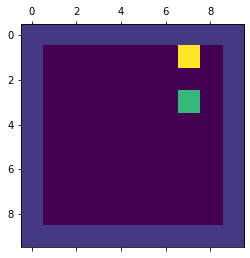

<Figure size 720x720 with 0 Axes>

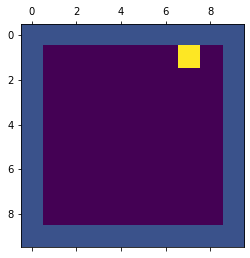

<Figure size 720x720 with 0 Axes>

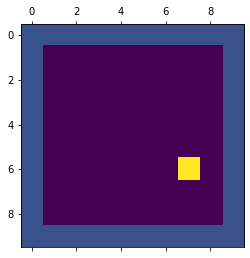

<Figure size 720x720 with 0 Axes>

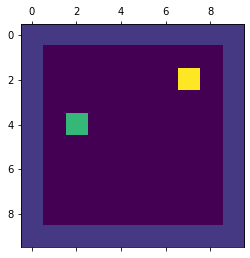

<Figure size 720x720 with 0 Axes>

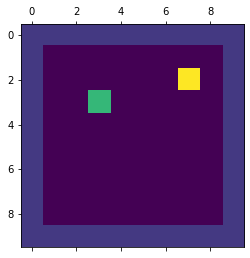

<Figure size 720x720 with 0 Axes>

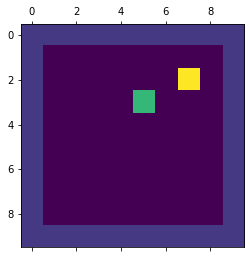

<Figure size 720x720 with 0 Axes>

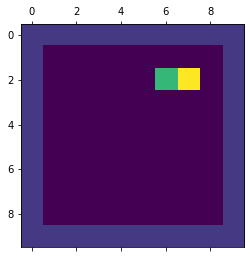

<Figure size 720x720 with 0 Axes>

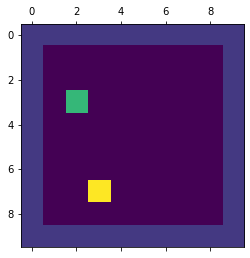

<Figure size 720x720 with 0 Axes>

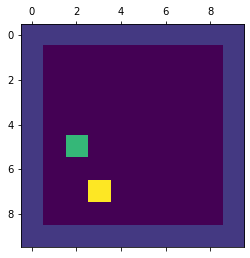

<Figure size 720x720 with 0 Axes>

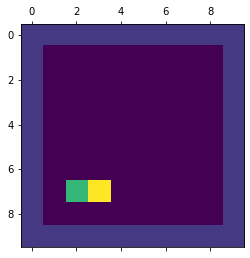

<Figure size 720x720 with 0 Axes>

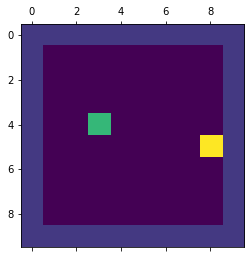

<Figure size 720x720 with 0 Axes>

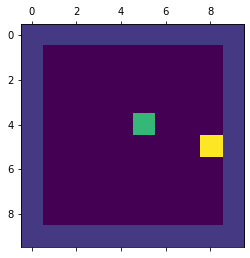

<Figure size 720x720 with 0 Axes>

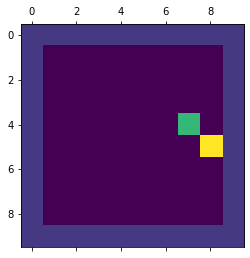

<Figure size 720x720 with 0 Axes>

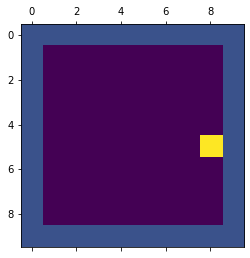

<Figure size 720x720 with 0 Axes>

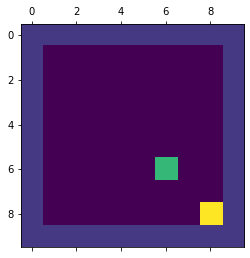

<Figure size 720x720 with 0 Axes>

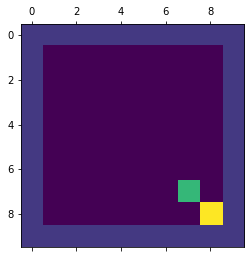

<Figure size 720x720 with 0 Axes>

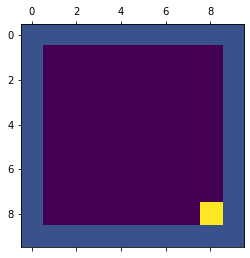

<Figure size 720x720 with 0 Axes>

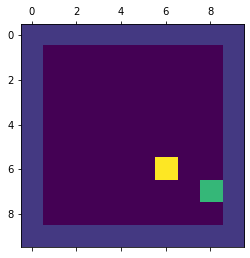

<Figure size 720x720 with 0 Axes>

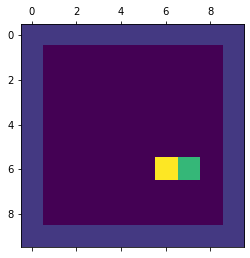

<Figure size 720x720 with 0 Axes>

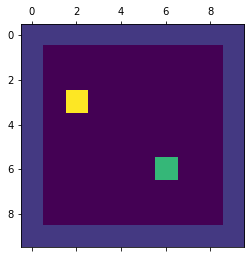

<Figure size 720x720 with 0 Axes>

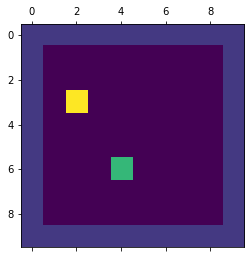

<Figure size 720x720 with 0 Axes>

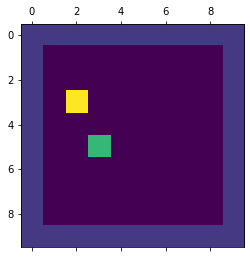

<Figure size 720x720 with 0 Axes>

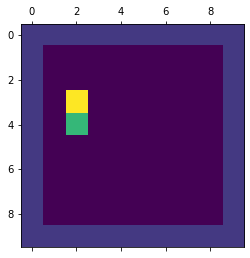

<Figure size 720x720 with 0 Axes>

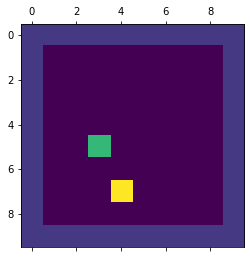

<Figure size 720x720 with 0 Axes>

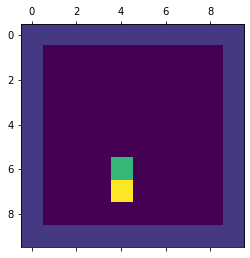

<Figure size 720x720 with 0 Axes>

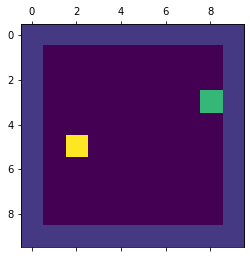

<Figure size 720x720 with 0 Axes>

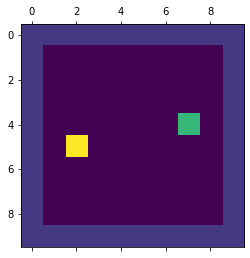

<Figure size 720x720 with 0 Axes>

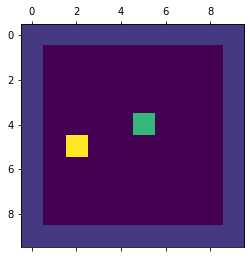

<Figure size 720x720 with 0 Axes>

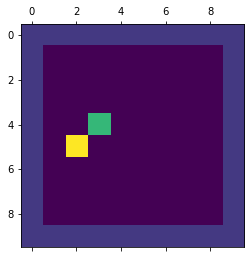

<Figure size 720x720 with 0 Axes>

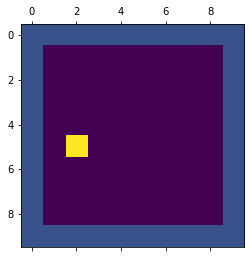

<Figure size 720x720 with 0 Axes>

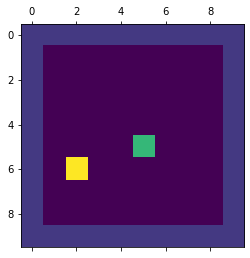

<Figure size 720x720 with 0 Axes>

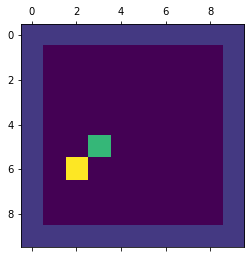

<Figure size 720x720 with 0 Axes>

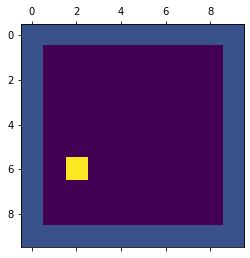

<Figure size 720x720 with 0 Axes>

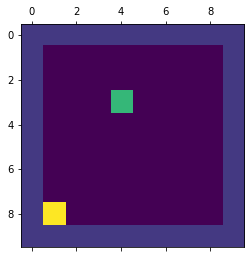

<Figure size 720x720 with 0 Axes>

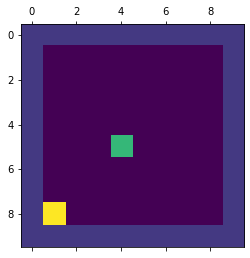

<Figure size 720x720 with 0 Axes>

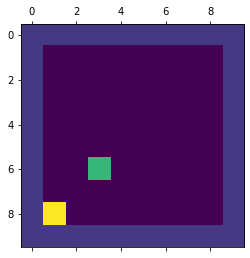

<Figure size 720x720 with 0 Axes>

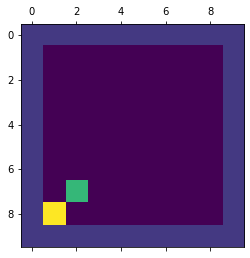

<Figure size 720x720 with 0 Axes>

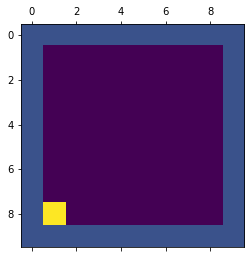

<Figure size 720x720 with 0 Axes>

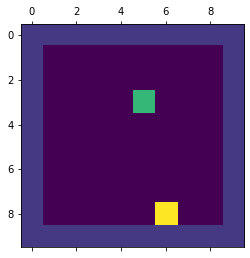

<Figure size 720x720 with 0 Axes>

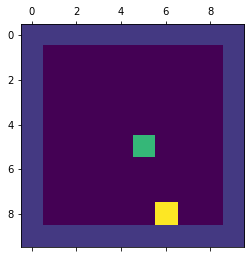

<Figure size 720x720 with 0 Axes>

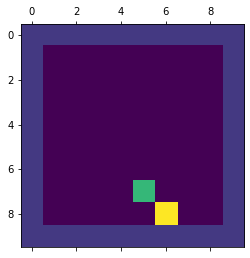

<Figure size 720x720 with 0 Axes>

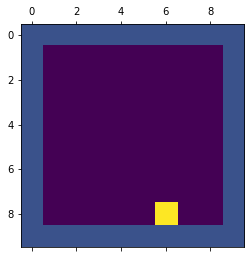

<Figure size 720x720 with 0 Axes>

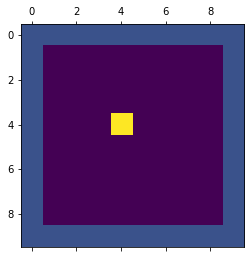

<Figure size 720x720 with 0 Axes>

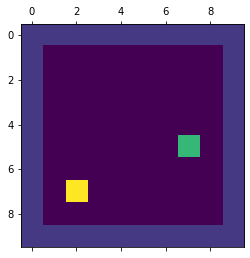

<Figure size 720x720 with 0 Axes>

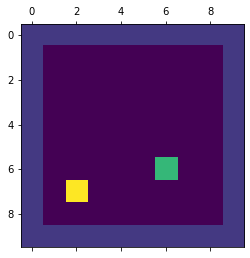

<Figure size 720x720 with 0 Axes>

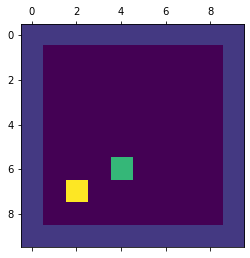

<Figure size 720x720 with 0 Axes>

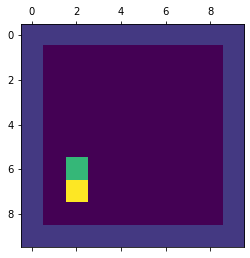

<Figure size 720x720 with 0 Axes>

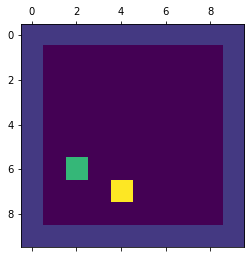

<Figure size 720x720 with 0 Axes>

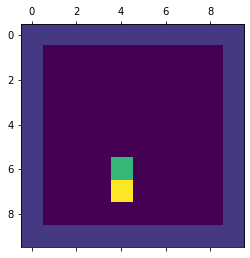

In [8]:
for i in range(20):
    env = MyEnv()
    for _ in range(max_num_steps):
        action, _states = model.predict(obs)
        obs, rewards, done, info = env.step(action)
        
        if _ % 2:
            env.render()
        if done is True:
            print(_)
            break

15


<Figure size 720x720 with 0 Axes>

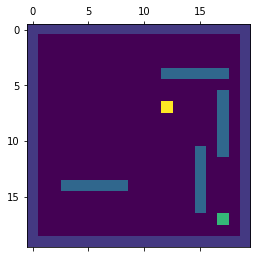

<Figure size 720x720 with 0 Axes>

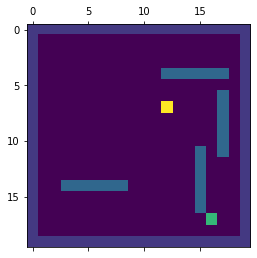

<Figure size 720x720 with 0 Axes>

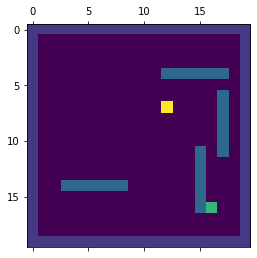

<Figure size 720x720 with 0 Axes>

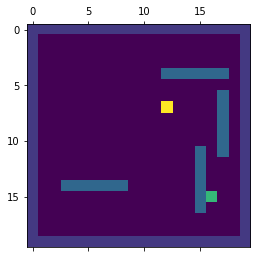

<Figure size 720x720 with 0 Axes>

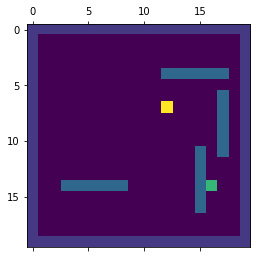

<Figure size 720x720 with 0 Axes>

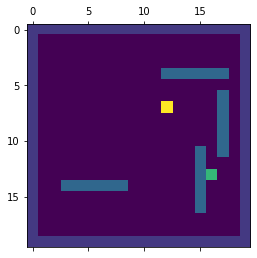

<Figure size 720x720 with 0 Axes>

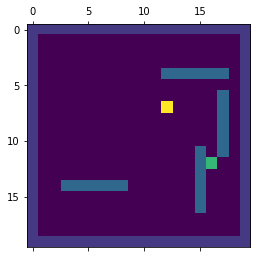

<Figure size 720x720 with 0 Axes>

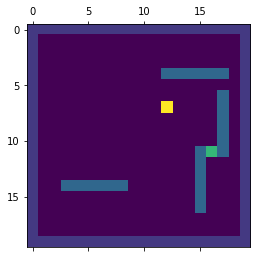

<Figure size 720x720 with 0 Axes>

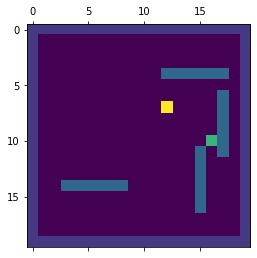

<Figure size 720x720 with 0 Axes>

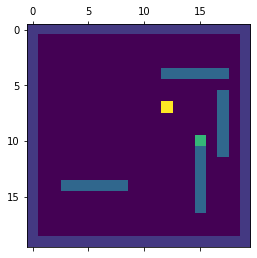

<Figure size 720x720 with 0 Axes>

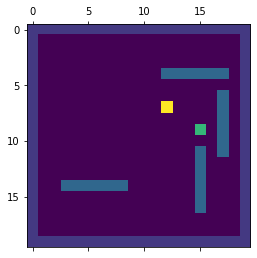

<Figure size 720x720 with 0 Axes>

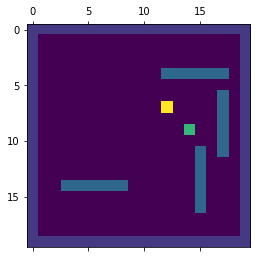

<Figure size 720x720 with 0 Axes>

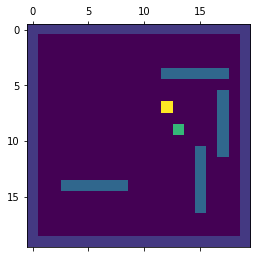

<Figure size 720x720 with 0 Axes>

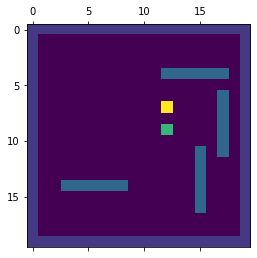

<Figure size 720x720 with 0 Axes>

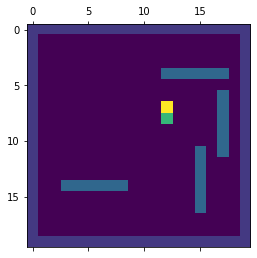

<Figure size 720x720 with 0 Axes>

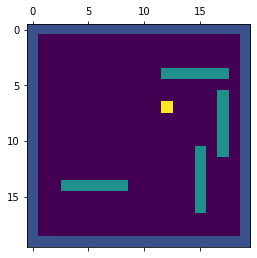

In [40]:
env = MyEnv(N=20)
for _ in range(max_num_steps):
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    env.render()
    if done is True:
        print(_)
        break